# Convolutional NN

We are going to use the same data of the number images and clothes images

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2024-11-28 16:02:56.929169: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-28 16:02:56.929313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-28 16:02:56.997732: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 16:02:57.154803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-28 16:02:59.202557: W tensorflow/compiler/tf2

2.15.0


In [4]:
# takingt the data 

from keras.utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [6]:
# Let's start creating the NN
# First a basic one layer of a 2D convolutional 

model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
# 5,5 is a traditional value of the number of pixels (or numer values) from the image
# (28,28,1) where the last one are the colors, in this case is just black and white
model.add(MaxPooling2D((2,2))) # this filter or kernal is for condensate the information
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
Total params: 832 (3.25 KB)
Trainable params: 832 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-11-28 17:28:25.802644: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-28 17:28:26.139693: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
# but to have a deep model, that it will work better for our case, 
# we need to add more layers

model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
Total params: 52096 (203.50 KB)
Trainable params: 52096 (203.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# now we will add the output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0         


 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 62346 (243.54 KB)
Trainable params: 62346 (243.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=100, epochs=5, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

test_loss, test_acc

Epoch 1/5
600/600 [==============================] - 17s 27ms/step - loss: 0.2051 - accuracy: 0.9419
Epoch 2/5
600/600 [==============================] - 14s 23ms/step - loss: 0.0561 - accuracy: 0.9829
Epoch 3/5
600/600 [==============================] - 14s 23ms/step - loss: 0.0397 - accuracy: 0.9878
Epoch 4/5
600/600 [==============================] - 14s 23ms/step - loss: 0.0309 - accuracy: 0.9900
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0273 - accuracy: 0.9908


(0.027268145233392715, 0.9908000230789185)

In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [18]:
checnum: int = 19

np.argmax(predictions[checnum]) , np.argmax(test_labels[checnum])

(4, 4)

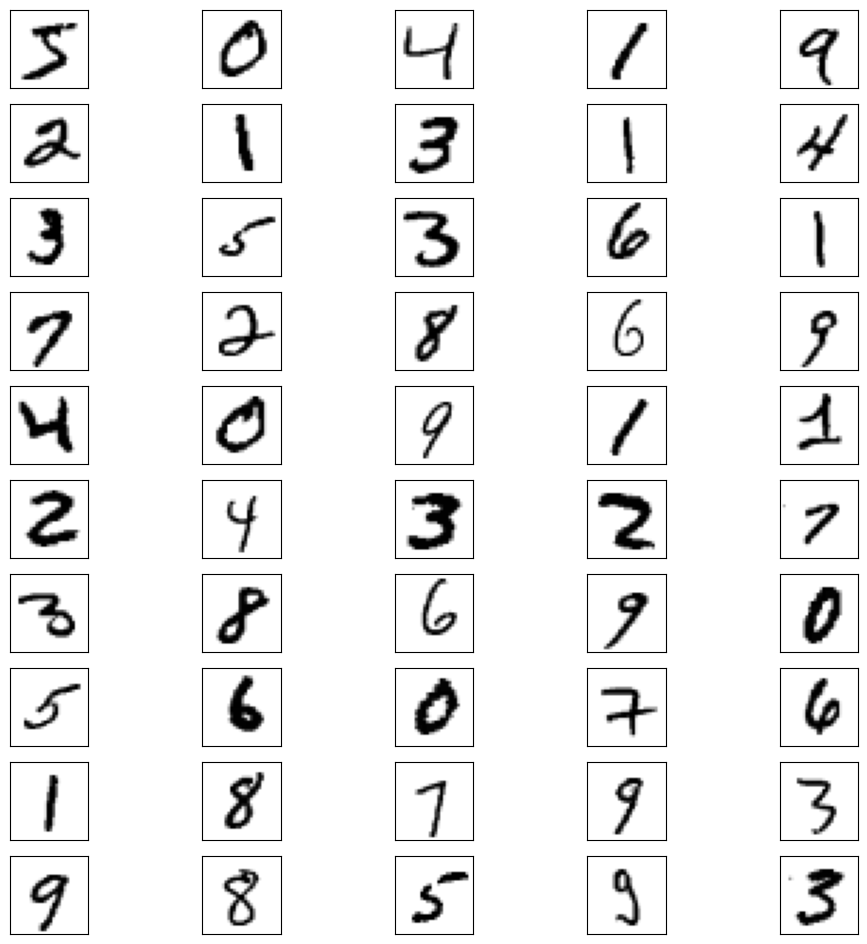

In [11]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

## Datos fashion-MNIST

In [19]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [21]:
# resize 

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

## model 1: the same that we used for the numbers

In [24]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4804 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3217 - accuracy: 0.8845
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2768 - accuracy: 0.9012
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2495 - accuracy: 0.9098
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2288 - accuracy: 0.9176


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

test_loss, test_acc 

313/313 [==============================] - 1s 4ms/step - loss: 0.2696 - accuracy: 0.9046


(0.26962223649024963, 0.9046000242233276)

In [28]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [30]:
# plot of the images
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

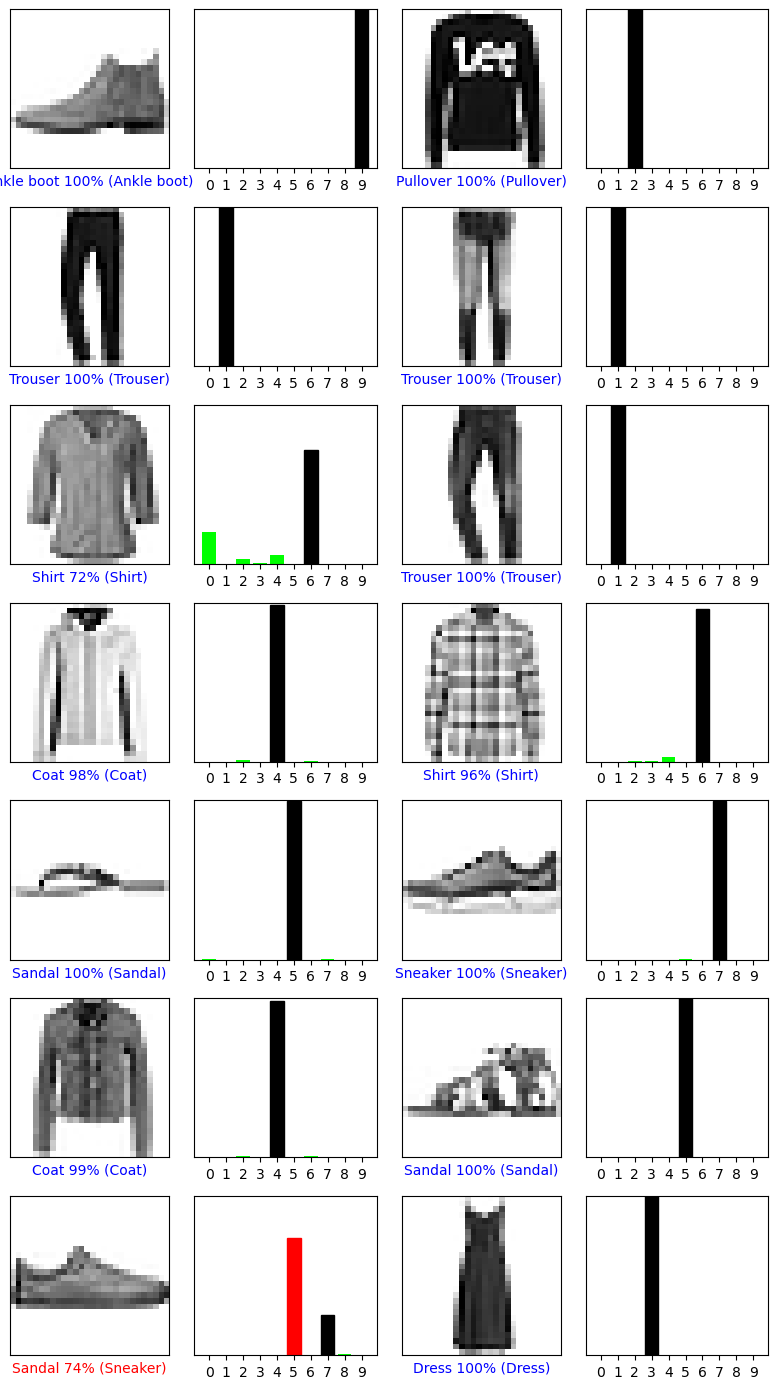

In [31]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:

num2 : int = 7

# np.argmax(predictions[num2]), test_labels[num2], class_names[num2]

# print(type(int(np.argmax(predictions[num2]))))
# print(type(int(np.argmax(test_labels[num2]))))
c1: int = 0
c2: int = 0
for i in range(10000):
    a = int(np.argmax(predictions[i]))
    b = int(test_labels[i])
    if a == b:
        c1+=1
    else:
        c2+=1

c1, c2


(9046, 954)

In [70]:
# let's reshape again for use another model 

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

### Model 2: using more neurons and adding an extra layer (regular one)

In [72]:
model = Sequential()

model.add(Conv2D(64, (5,5), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [73]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

test_loss, test_acc

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4032 - accuracy: 0.8546
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2635 - accuracy: 0.9036
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2201 - accuracy: 0.9184
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1887 - accuracy: 0.9294
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2387 - accuracy: 0.9155


(0.2387150079011917, 0.9154999852180481)

In [74]:
predictions = model.predict(test_images)

313/313 [==============================] - 5s 15ms/step


In [75]:
c1: int = 0
c2: int = 0
for i in range(10000):
    a = int(np.argmax(predictions[i]))
    b = int(test_labels[i])
    if a == b:
        c1+=1
    else:
        c2+=1

c1, c2

(9155, 845)

### Model 3: Using layers BathNormalization and Dropout

In [79]:
from tensorflow.keras.layers import Dropout, BatchNormalization

# BatchNormalization is a normalization in all the entries of the NN
# Dropout, is ignoring some neurons in some iterations, to avoid overfit

def make_model():
    model = Sequential()
    
    # convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    # normla layers 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model 

    
    

In [80]:
model = make_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

test_loss, test_acc

Epoch 1/5
1875/1875 [==============================] - 206s 109ms/step - loss: 0.4943 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 208s 111ms/step - loss: 0.3286 - accuracy: 0.8831
Epoch 3/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.2917 - accuracy: 0.8949
Epoch 4/5
1875/1875 [==============================] - 209s 112ms/step - loss: 0.2699 - accuracy: 0.9044
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2205 - accuracy: 0.9202


(0.220549076795578, 0.920199990272522)

Due to the bigger complexity of the model we will need more iterations (meaning more epochs). But we can also play with the learning rate and decay rate of the adam optimizer 

In [82]:
model = make_model()

optimizer = tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

decay_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3*0.9**x)

model.fit(train_images, train_labels, epochs=30, callbacks=[decay_lr])

test_loss, test_acc = model.evaluate(test_images, test_labels)

test_loss, test_acc

Epoch 1/30
1875/1875 [==============================] - 203s 107ms/step - loss: 0.5139 - accuracy: 0.8208 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 209s 111ms/step - loss: 0.3263 - accuracy: 0.8853 - lr: 9.0000e-04
Epoch 3/30
1875/1875 [==============================] - 214s 114ms/step - loss: 0.2821 - accuracy: 0.9002 - lr: 8.1000e-04
Epoch 4/30
1875/1875 [==============================] - 198s 105ms/step - loss: 0.2546 - accuracy: 0.9101 - lr: 7.2900e-04
Epoch 5/30
1875/1875 [==============================] - 210s 112ms/step - loss: 0.2327 - accuracy: 0.9168 - lr: 6.5610e-04
Epoch 6/30
1875/1875 [==============================] - 210s 112ms/step - loss: 0.2171 - accuracy: 0.9221 - lr: 5.9049e-04
Epoch 7/30
1875/1875 [==============================] - 210s 112ms/step - loss: 0.2015 - accuracy: 0.9277 - lr: 5.3144e-04
Epoch 8/30
1875/1875 [==============================] - 217s 115ms/step - loss: 0.1836 - accuracy: 0.9334 - lr: 4.7830e-04
Epoch 9/30
1875/1875

(0.19935058057308197, 0.9376000165939331)

313/313 [==============================] - 5s 16ms/step


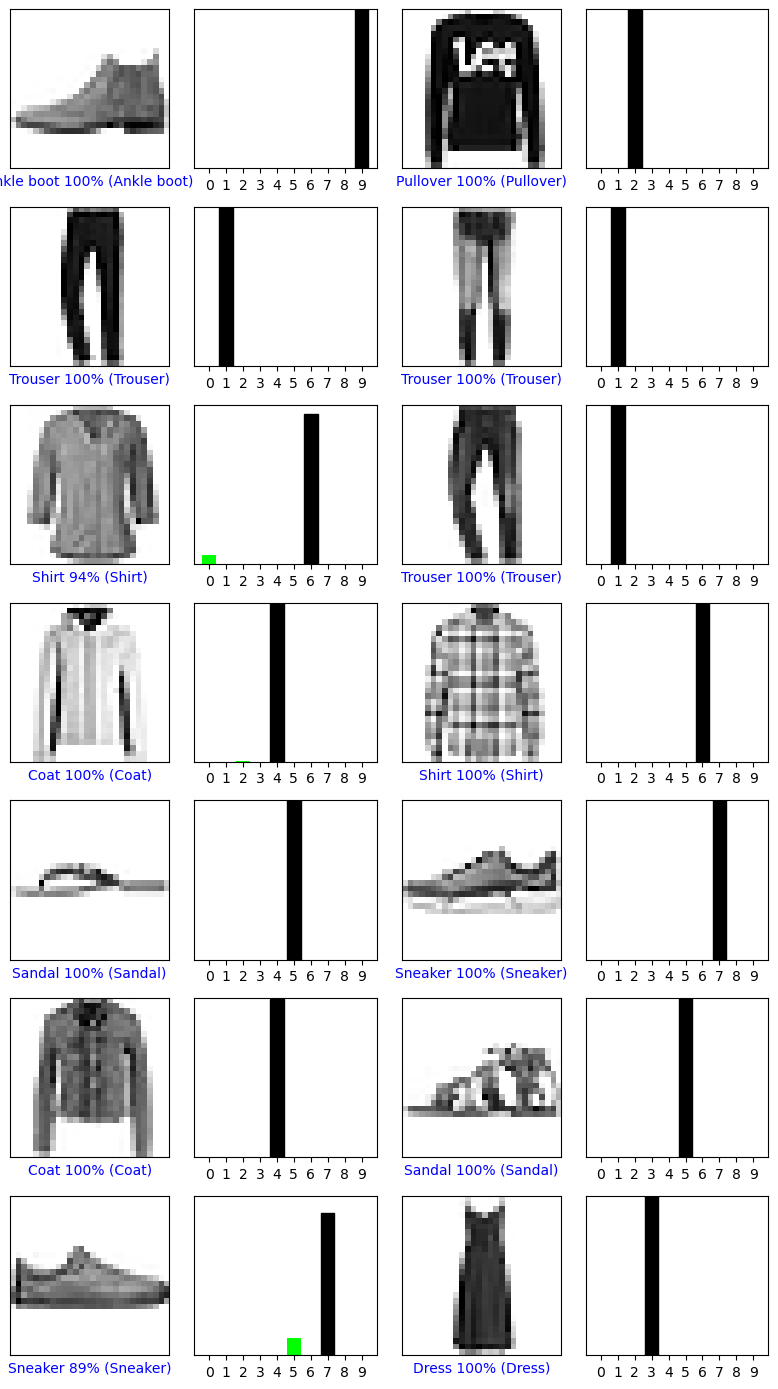

In [83]:

predictions = model.predict(test_images)

train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))


num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()